# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O macd_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/macd_crossover/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' macd_crossover.py

--2024-01-13 23:08:50--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/macd_crossover/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2758 (2.7K) [text/plain]
Saving to: ‘macd_crossover.py’

macd_crossover.py   100%[===================>]   2.69K  --.-KB/s    in 0s      

2024-01-13 23:08:51 (41.1 MB/s) - ‘macd_crossover.py’ saved [2758/2758]



In [6]:
from macd_crossover import MACDCrossover as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': None,
 'strategyId': '953d986296d84292b3d2d4c5f75eef5e'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('CDSL', exchange='NSE')
instrument

[{'id': 126, 'value': 'NSE:CDSL'},
 {'id': 875194, 'value': 'NSE:CDSL.BE'},
 {'id': 2174529, 'value': 'NSE:CDSL.BL'},
 {'id': 711363, 'value': 'NSE:ICDSLTD.BE'}]

## Setup Parameters

In [10]:
parameters = {
  'TIMEPERIOD_FAST': 12,
  'TIMEPERIOD_SIGNAL': 9,
  'TIMEPERIOD_SLOW': 26
}

In [11]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530',
    instrument='NSE:CDSL', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'MACD Crossover' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                                  │
╞═════════════════════════╪════════════════════════════════════════════════════════════════════════╡
│ Strategy Name           │ MACD Crossover                                                         │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                                            │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:CDSL']                                                           │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2024-01-13 23:09:55] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-01-13 23:09:55] Sanity checks on cfg successful.
[2024-01-13 23:09:55] Currency set to "INR"
[2024-01-13 23:09:55] Setting up broker connection...
[2024-01-13 23:09:59] Broker connection has been setup successfully.
[2024-01-13 23:09:59] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2024-01-13 23:09:59] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-01-13 23:09:59] Welcome ALGOBULLS VIRTUAL USER!
[2024-01-13 23:09:59] Reading strategy...
[2024-01-13 23:09:59] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,CDSL,2021-08-04 14:15:00+05:30,SELL,2,₹,1346.20,,2021-08-04 15:30:00+05:30,BUY,2,₹,1330.00,,32.4,32.4,0,32.4
1,NSE,CDSL,2021-08-06 09:15:00+05:30,BUY,2,₹,1312.50,,2021-08-06 15:30:00+05:30,SELL,2,₹,1336.10,,47.2,79.6,0,47.2
2,NSE,CDSL,2021-08-10 10:15:00+05:30,SELL,2,₹,1295.95,,2021-08-10 15:30:00+05:30,BUY,2,₹,1280.00,,31.9,111.5,0,31.9
3,NSE,CDSL,2021-08-16 09:15:00+05:30,BUY,2,₹,1250.00,,2021-08-16 11:15:00+05:30,SELL,2,₹,1231.50,,-37.0,74.5,0,-37.0
4,NSE,CDSL,2021-08-16 11:15:00+05:30,SELL,2,₹,1231.50,,2021-08-16 13:15:00+05:30,BUY,2,₹,1230.90,,1.2,75.7,0,1.2
5,NSE,CDSL,2021-08-16 13:15:00+05:30,BUY,2,₹,1230.90,,2021-08-16 15:30:00+05:30,SELL,2,₹,1230.00,,-1.8,73.9,0,-1.8
6,NSE,CDSL,2021-08-23 11:15:00+05:30,SELL,2,₹,1170.00,,2021-08-23 15:30:00+05:30,BUY,2,₹,1149.00,,42.0,115.9,0,42.0
7,NSE,CDSL,2021-08-24 14:15:00+05:30,BUY,2,₹,1169.90,,2021-08-24 15:30:00+05:30,SELL,2,₹,1196.00,,52.2,168.1,0,52.2
8,NSE,CDSL,2021-08-31 15:15:00+05:30,SELL,2,₹,1190.00,,2021-08-31 15:30:00+05:30,BUY,2,₹,1190.00,,0.0,168.1,0,0.0
9,NSE,CDSL,2021-09-06 10:15:00+05:30,BUY,2,₹,1210.50,,2021-09-06 15:30:00+05:30,SELL,2,₹,1210.00,,-1.0,167.1,0,-1.0


### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-04
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      86.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              1.68
Prob. Sharpe Ratio  94.44%
Sortino             3.29
Sortino/√2          2.33
Omega               1.43

Max Drawdown        -0.0%
Longest DD Days     341

Gain/Pain Ratio     0.46
Gain/Pain (1M)      1.47

Payoff Ratio        1.49
Profit Factor       1.43
Common Sense Ratio  2.21
CPC Index           1.05
Tail Ratio          1.55
Outlier Win Ratio   6.47
Outlier Loss Ratio  3.45

MTD                 -0.0%
3M                  -0.0%
6M                  -0.0%
YTD                 -0.0%
1Y                  -0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  43
Recovery Factor     1.83
Ulcer Index         0.0
Serenity Index      0.31


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-04
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             86.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     1.68
Prob. Sharpe Ratio         94.44%
Smart Sharpe               1.39
Sortino                    3.29
Smart Sortino              2.73
Sortino/√2                 2.33
Smart Sortino/√2           1.93
Omega                      1.43

Max Drawdown               -0.0%
Longest DD Days            341
Volatility (ann.)          0.0%
Calmar                     0.92
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            14.77%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       6
Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-08-24,2023-07-03,2023-07-31,341,-0.000037,-0.000036
2,2021-11-03,2021-11-09,2021-11-30,27,-0.000015,-0.000015
3,2022-03-28,2022-04-20,2022-05-02,34,-0.000011,-0.000009
4,2021-12-08,2022-01-06,2022-01-13,35,-0.000009,-0.000009
5,2022-07-11,2022-08-03,2022-08-12,32,-0.000009,-0.000009


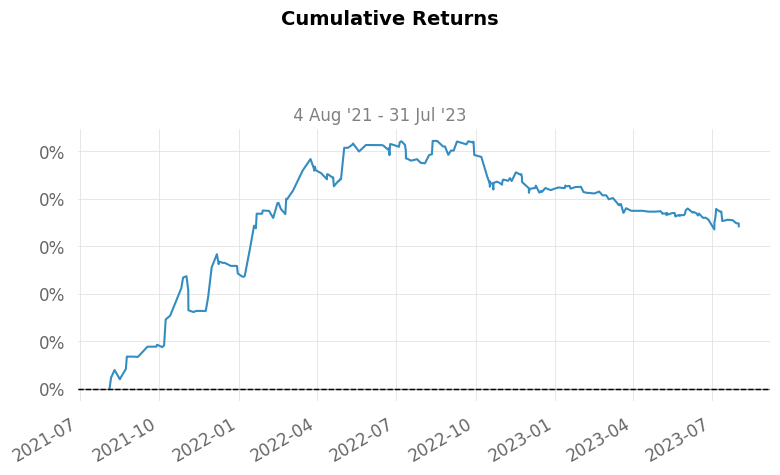

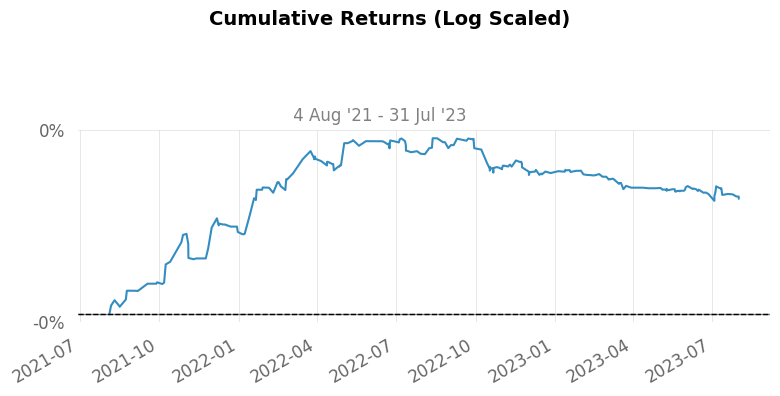

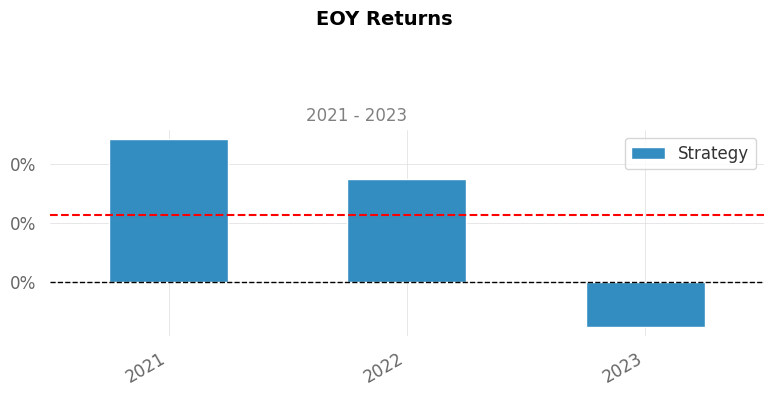

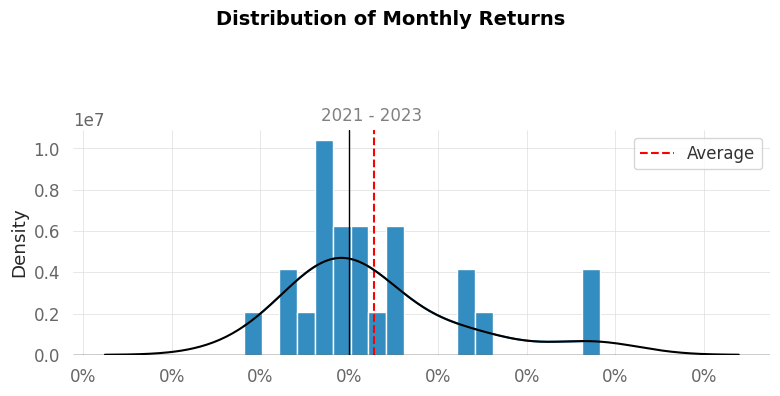

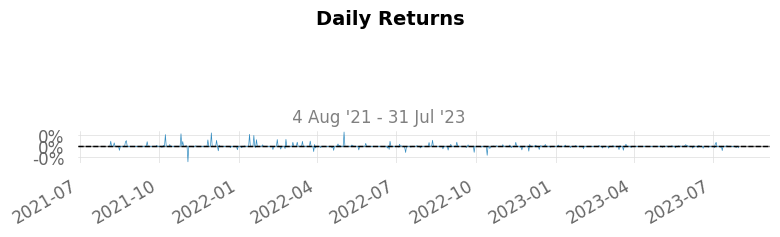

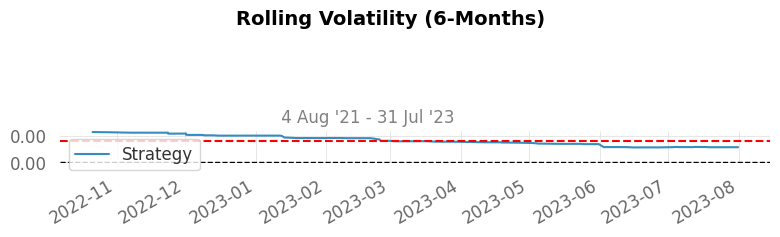

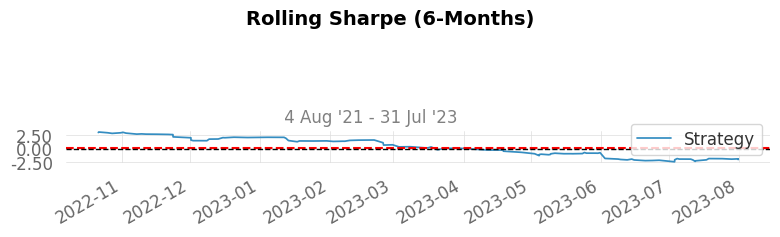

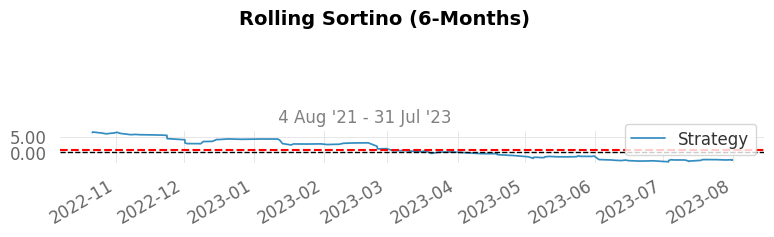

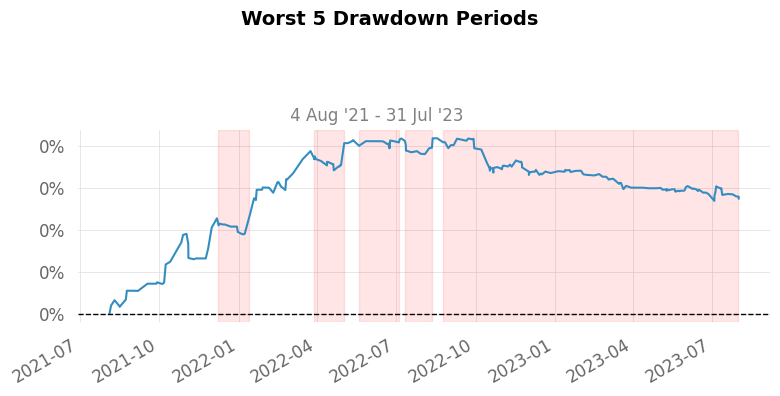

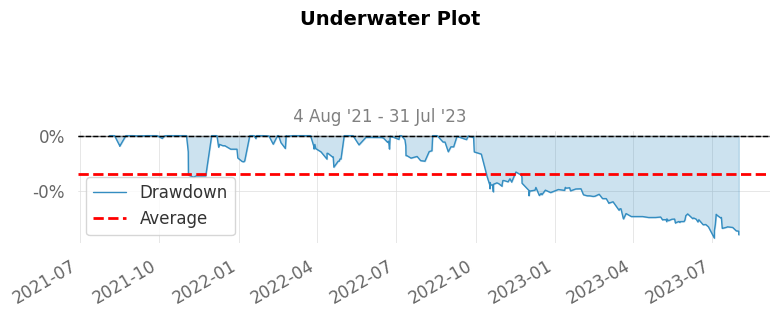

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


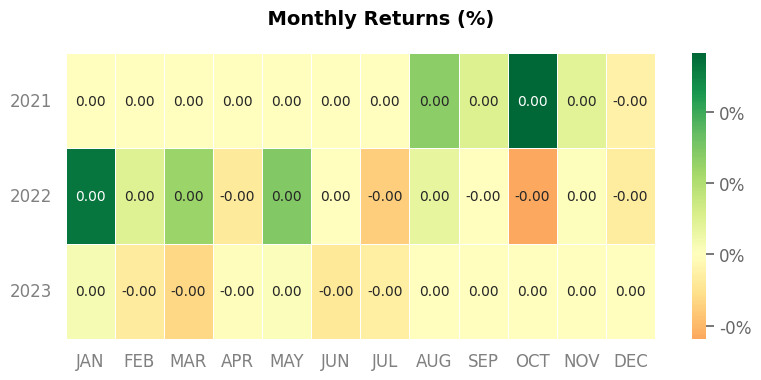

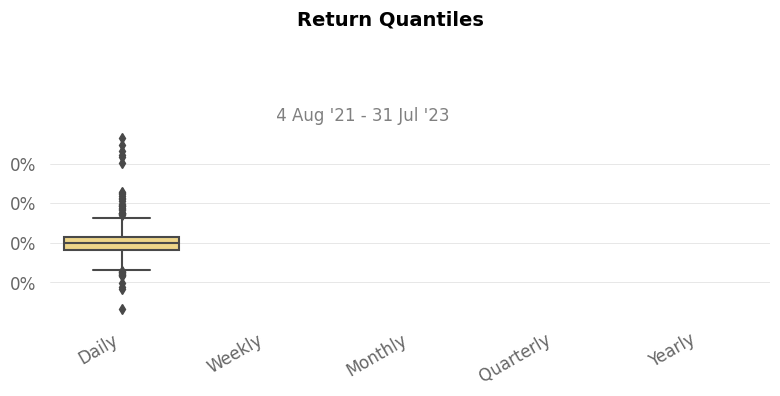

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 57690b7a04624b8fbbb563e1009b2a17 |
| Transaction Type | SELL                             |
| Instrument       | NSE:CDSL                         |
| Quantity         | 2                                |
| Price            | ₹1231.15                         |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-13T17:41:46.405397Z | COMPLETE               |
| 2024-01-13T17:41:46.405380Z | OPEN                   |
| 2024-01-13T17:41:46.405364Z | OPEN PENDING           |
| 2024-01-13T17:41:46.405344Z | VALIDATION PENDING     |
| 2024-01-13T17:41:46.405294Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | c00d7f8b2e934e899

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---